Calculation of number of $\nu_\mu$ CC interactions expected in the ATLAS Tile Cal (part of Hcal) from high energy supernova neutrinos

In [9]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
#import nuflux
import pandas as pd
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import imageio
import uproot
import itertools
import SNeATLAS
from varname import nameof
%matplotlib inline

### Cross section

Obtained from Alfonso. Given only as $\nu_\mu, \overline{\nu}_\mu \rightarrow p , n $. So to get the CS on something like iron, we multiply the number of nucleons by the appropriate atomic number/mass number (as a rough estimate). No high energy cross sections are currently available taking into account entire nuclei. 

### Flux

Flux given as 

$$\Phi = \frac{dN}{dE dA dt}$$

where $\sigma$ is the $\nu_\mu \rightarrow Fe56$ CC cross-section. so the total differential number of events is 

$$dN = \Phi(E) d\sigma dt dE \times (\text{iron atoms in detector})$$

and since the flux has a time dependence (supernova)

$$N = \int_E \Phi(E,t) \sigma(E) dE \times dt (\text{# Fe atoms in Hcal}) $$

For our astrophysical case, the flux is given from Murase [here](https://github.com/pegasuskmurase/ModelTemplates). It is in terms of total neutrino number, so it includes (1,1,1) flavor ratio. *Find out if this is physically the case!*


In [2]:
# assumed astronomical input parameters: 
flavor_ratio = [1,1,1]
energy_range = [500,1e7] # in GeV: Murase22 uses 500 GeV to 1 PeV
s_index = 2.0 # cosmic ray index
D_st = 1e-2 # normalized Dstar parameter

galaxy_dist = 3.086e22 # 10 kpc in cm

# neutrino mixing parameters
theta_12 = 0.563942
theta_13 = 0.154085
theta_23 = 0.785398
delta_m2_12 = 7.65e-05
delta_m2_13 = delta_m2_23 = 0.00247
deltaCP = 0.0

hbar = 6.582e-16 
c_light = 3e8

## Event rate binned in energy

In [3]:
energyaxis = np.logspace(np.log10(100), np.log10(1e7), num=50)

event_hist_2P_D0_01_s20 = np.zeros(len(energyaxis)-1)
event_hist_2P_D0_1_s20 = np.zeros(len(energyaxis)-1)
event_hist_2P_D1_0_s20 = np.zeros(len(energyaxis)-1)
event_hist_2P_D0_01_s22 = np.zeros(len(energyaxis)-1)
event_hist_2P_D0_1_s22 = np.zeros(len(energyaxis)-1)
event_hist_2P_D1_0_s22 = np.zeros(len(energyaxis)-1)

event_hist_2n_D0_01_s20 = np.zeros(len(energyaxis)-1)
event_hist_2n_D0_1_s20 = np.zeros(len(energyaxis)-1)
event_hist_2n_D1_0_s20 = np.zeros(len(energyaxis)-1)
event_hist_2n_D0_01_s22 = np.zeros(len(energyaxis)-1)
event_hist_2n_D0_1_s22 = np.zeros(len(energyaxis)-1)
event_hist_2n_D1_0_s22 = np.zeros(len(energyaxis)-1)

#event_hist_2n_D0_1 = np.zeros(len(energyaxis)-1)

SNe_2P_D0_01_s20 = SNeATLAS.make_SNeEvent(detMass=4e6,
                    flux_filename='ModelTemplates/SNHEMM/II-P/FinalFluxs20.dat')
SNe_2P_D0_1_s20 = SNeATLAS.make_SNeEvent(detMass=4e6,
                    flux_filename='ModelTemplates/SNHEMM/II-PD0_1/FinalFluxs20.dat')
SNe_2P_D1_0_s20 = SNeATLAS.make_SNeEvent(detMass=4e6,
                    flux_filename='ModelTemplates/SNHEMM/II-PD1_0Rw1e15/FinalFluxs20.dat')
SNe_2P_D0_01_s22 = SNeATLAS.make_SNeEvent(detMass=4e6,
                    flux_filename='ModelTemplates/SNHEMM/II-P/FinalFluxs22.dat')
SNe_2P_D0_1_s22 = SNeATLAS.make_SNeEvent(detMass=4e6,
                    flux_filename='ModelTemplates/SNHEMM/II-PD0_1/FinalFluxs22.dat')
SNe_2P_D1_0_s22 = SNeATLAS.make_SNeEvent(detMass=4e6,
                    flux_filename='ModelTemplates/SNHEMM/II-PD1_0Rw1e15/FinalFluxs22.dat')

SNe_2n_D1_0_s20 = SNeATLAS.make_SNeEvent(detMass=4e6,
                    flux_filename='ModelTemplates/SNHEMM/IIn/FinalFluxs20.dat')
SNe_2n_D0_1_s20 = SNeATLAS.make_SNeEvent(detMass=4e6,
                    flux_filename='ModelTemplates/SNHEMM/IInD0_1/FinalFluxs20.dat')
SNe_2n_D0_01_s20 = SNeATLAS.make_SNeEvent(detMass=4e6,
                    flux_filename='ModelTemplates/SNHEMM/IInD0_01/FinalFluxs20.dat')
SNe_2n_D1_0_s22 = SNeATLAS.make_SNeEvent(detMass=4e6,
                    flux_filename='ModelTemplates/SNHEMM/IIn/FinalFluxs22.dat')
SNe_2n_D0_1_s22 = SNeATLAS.make_SNeEvent(detMass=4e6,
                    flux_filename='ModelTemplates/SNHEMM/IInD0_1/FinalFluxs22.dat')
SNe_2n_D0_01_s22 = SNeATLAS.make_SNeEvent(detMass=4e6,
                    flux_filename='ModelTemplates/SNHEMM/IInD0_01/FinalFluxs22.dat')

for i in range(len(energyaxis)-1): 
    event_hist_2P_D0_01_s20[i] = SNe_2P_D0_01_s20.get_eventNumber_intLogLogSpace(galaxy_dist, [energyaxis[i], energyaxis[i+1]])
    event_hist_2P_D0_1_s20[i] = SNe_2P_D0_1_s20.get_eventNumber_intLogLogSpace(galaxy_dist, [energyaxis[i], energyaxis[i+1]])
    event_hist_2P_D1_0_s20[i] = SNe_2P_D1_0_s20.get_eventNumber_intLogLogSpace(galaxy_dist, [energyaxis[i], energyaxis[i+1]])
    event_hist_2P_D0_01_s22[i] = SNe_2P_D0_01_s22.get_eventNumber_intLogLogSpace(galaxy_dist, [energyaxis[i], energyaxis[i+1]])
    event_hist_2P_D0_1_s22[i] = SNe_2P_D0_1_s22.get_eventNumber_intLogLogSpace(galaxy_dist, [energyaxis[i], energyaxis[i+1]])
    event_hist_2P_D1_0_s22[i] = SNe_2P_D1_0_s22.get_eventNumber_intLogLogSpace(galaxy_dist, [energyaxis[i], energyaxis[i+1]])
    
    event_hist_2n_D0_01_s20[i] = SNe_2n_D0_01_s20.get_eventNumber_intLogLogSpace(galaxy_dist, [energyaxis[i], energyaxis[i+1]])
    event_hist_2n_D0_1_s20[i] = SNe_2n_D0_1_s20.get_eventNumber_intLogLogSpace(galaxy_dist, [energyaxis[i], energyaxis[i+1]])
    event_hist_2n_D1_0_s20[i] = SNe_2n_D1_0_s20.get_eventNumber_intLogLogSpace(galaxy_dist, [energyaxis[i], energyaxis[i+1]])
    event_hist_2n_D0_01_s22[i] = SNe_2n_D0_01_s22.get_eventNumber_intLogLogSpace(galaxy_dist, [energyaxis[i], energyaxis[i+1]])
    event_hist_2n_D0_1_s22[i] = SNe_2n_D0_1_s22.get_eventNumber_intLogLogSpace(galaxy_dist, [energyaxis[i], energyaxis[i+1]])
    event_hist_2n_D1_0_s22[i] = SNe_2n_D1_0_s22.get_eventNumber_intLogLogSpace(galaxy_dist, [energyaxis[i], energyaxis[i+1]])

/Users/alexwen/Documents/neutrinos/ATLAS_SNeNeutrinos/SNeATLAS.py:13: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral = sp.integrate.quad(integrand, np.log10(a), np.log10(b), limit=100000)
/Users/alexwen/Documents/neutrinos/ATLAS_SNeNeutrinos/SNeATLAS.py:13: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral = sp.integrate.quad(integrand, np.log10(a), np.log10(b), limit=100000)
/Users/alexwen/Documents/neutrinos/ATLAS_SNeNeutrinos/SNeATLAS.py:13: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral = sp.integrate.quad(integrand, np.log10(a), np.log10(b), limit=100000)
/Users/alexwen/Documents/neutrinos/ATLAS_SNeNe

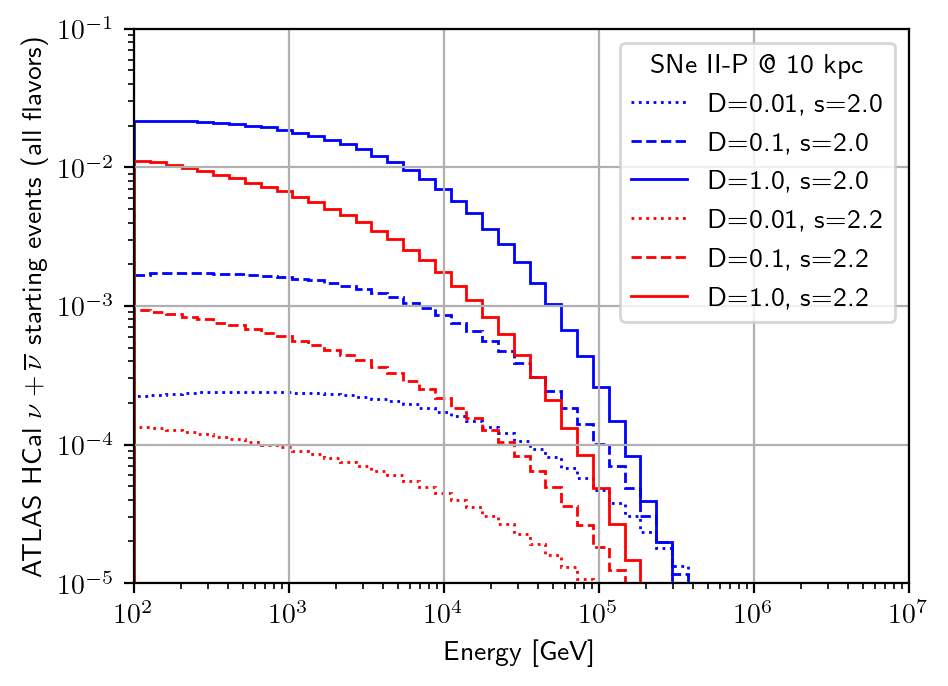

In [4]:
plt.rcParams['text.usetex'] = True
fig = plt.figure(figsize=(5, 3.6), dpi=200)

plt.stairs(event_hist_2P_D0_01_s20, energyaxis, label='D=0.01, s=2.0', color='blue', linestyle=':')
plt.stairs(event_hist_2P_D0_1_s20, energyaxis, label='D=0.1, s=2.0', color='blue', linestyle='--')
plt.stairs(event_hist_2P_D1_0_s20, energyaxis, label='D=1.0, s=2.0', color='blue')

plt.stairs(event_hist_2P_D0_01_s22, energyaxis, label='D=0.01, s=2.2', color='red', linestyle=':')
plt.stairs(event_hist_2P_D0_1_s22, energyaxis, label='D=0.1, s=2.2', color='red', linestyle='--')
plt.stairs(event_hist_2P_D1_0_s22, energyaxis, label='D=1.0, s=2.2', color='red')
#plt.stairs(event_hist_2n_D0_1, energyaxis, label='SNe IIn D=0.1', color='red', linestyle=':')

plt.xscale('log'); plt.xlim(100,1e7)
plt.yscale('log'); plt.ylim(1e-5, 1e-1)
plt.xlabel('Energy [GeV]')
plt.ylabel(r'ATLAS HCal $\nu + \overline{\nu}$ starting events (all flavors)')
plt.legend(loc='upper right', title='SNe II-P @ 10 kpc')
plt.grid()

### Export fluxes for a particular SNe case (e.g. for throughgoing events calculation)

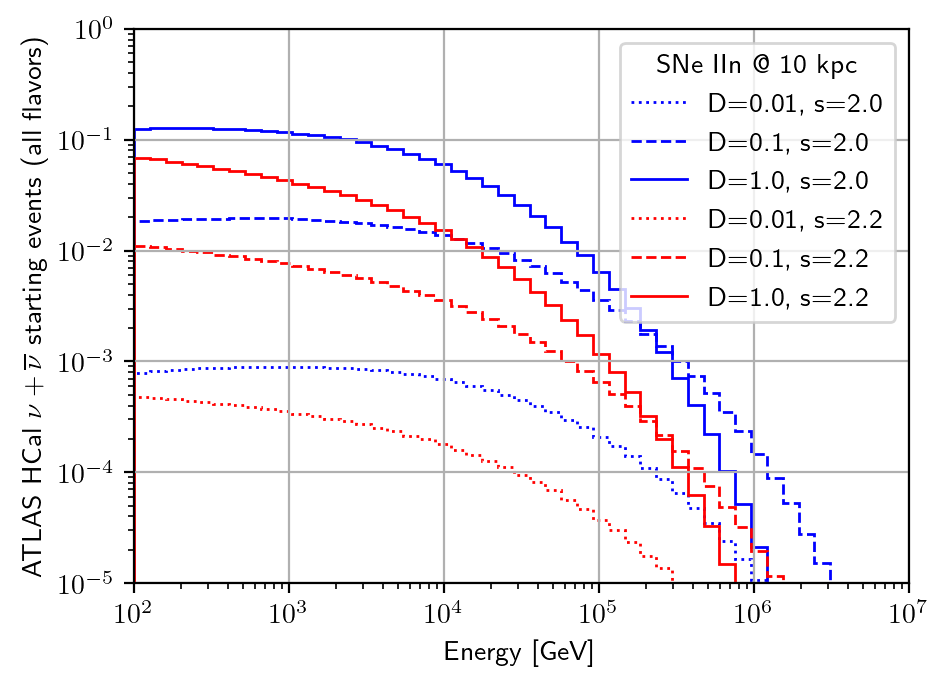

In [5]:
plt.rcParams['text.usetex'] = True
fig = plt.figure(figsize=(5, 3.6), dpi=200)

plt.stairs(event_hist_2n_D0_01_s20, energyaxis, label='D=0.01, s=2.0', color='blue', linestyle=':')
plt.stairs(event_hist_2n_D0_1_s20, energyaxis, label='D=0.1, s=2.0', color='blue', linestyle='--')
plt.stairs(event_hist_2n_D1_0_s20, energyaxis, label='D=1.0, s=2.0', color='blue')

plt.stairs(event_hist_2n_D0_01_s22, energyaxis, label='D=0.01, s=2.2', color='red', linestyle=':')
plt.stairs(event_hist_2n_D0_1_s22, energyaxis, label='D=0.1, s=2.2', color='red', linestyle='--')
plt.stairs(event_hist_2n_D1_0_s22, energyaxis, label='D=1.0, s=2.2', color='red')
#plt.stairs(event_hist_2n_D0_1, energyaxis, label='SNe IIn D=0.1', color='red', linestyle=':')

plt.xscale('log'); plt.xlim(100,1e7)
plt.yscale('log'); plt.ylim(1e-5, 1e0)
plt.xlabel('Energy [GeV]')
plt.ylabel(r'ATLAS HCal $\nu + \overline{\nu}$ starting events (all flavors)')
plt.legend(loc='upper right', title='SNe IIn @ 10 kpc')
plt.grid()

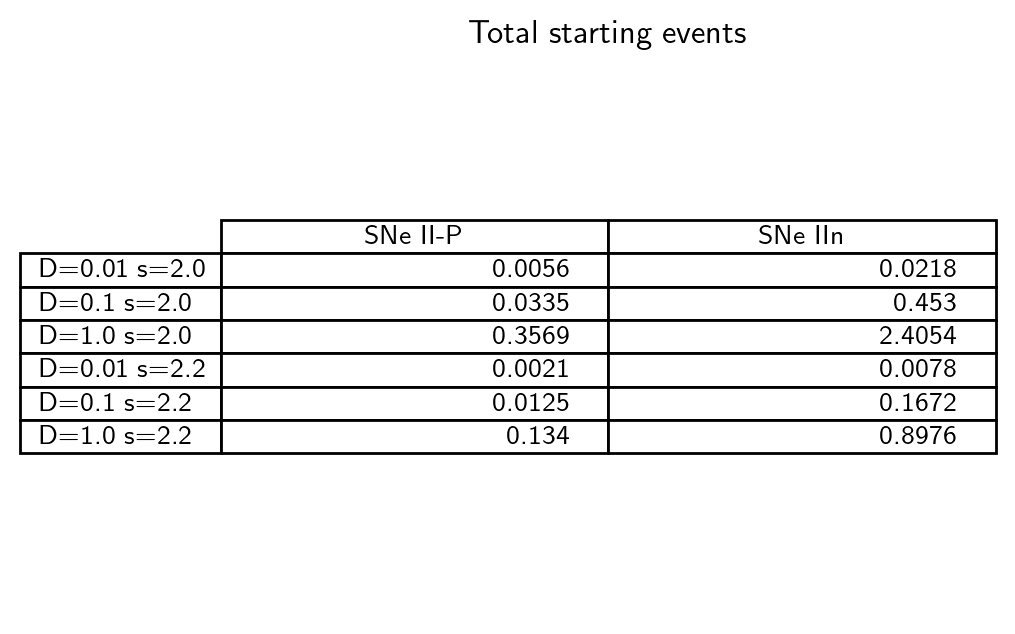

In [6]:
fig, ax = plt.subplots(figsize=(5, 3.6), dpi=200)
# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

values = [ [sum(event_hist_2P_D0_01_s20), sum(event_hist_2n_D0_01_s20)],
           [sum(event_hist_2P_D0_1_s20), sum(event_hist_2n_D0_1_s20)],
           [sum(event_hist_2P_D1_0_s20), sum(event_hist_2n_D1_0_s20)],
           [sum(event_hist_2P_D0_01_s22), sum(event_hist_2n_D0_01_s22)], 
           [sum(event_hist_2P_D0_1_s22), sum(event_hist_2n_D0_1_s22)],
           [sum(event_hist_2P_D1_0_s22), sum(event_hist_2n_D1_0_s22)]]
values= np.round(values, 4)

row_labels = [ 'D=0.01 s=2.0', 'D=0.1 s=2.0', 'D=1.0 s=2.0', 'D=0.01 s=2.2', 'D=0.1 s=2.2', 'D=1.0 s=2.2' ]

ax.table(cellText = values, colLabels=['SNe II-P', 'SNe IIn'], rowLabels =row_labels, loc='center', fontsize=14)
ax.set_title('Total starting events')
#fig.tight_layout()

plt.show()

In [7]:
cm_in_kpc = 3.086e19 * (100)

distance_array = np.arange(0.001, 25, 0.2) # in kpc
counts_2n_D0_01 = np.asarray([]); counts_2n_D0_1 = np.asarray([]); counts_2n_D1_0 = np.asarray([])
counts_2P_D0_01 = np.asarray([]); counts_2P_D0_1 = np.asarray([]); counts_2P_D1_0 = np.asarray([])

SNe_2n_D1_0_s20_test =  SNeATLAS.make_SNeEvent(detMass=4e6,
                            flux_filename='ModelTemplates/SNHEMM/IIn/FinalFluxs20.dat')
SNe_2P_D0_1_s20_test =  SNeATLAS.make_SNeEvent(detMass=4e6,
                            flux_filename='ModelTemplates/SNHEMM/II-PD0_1/FinalFluxs20.dat')

SNe_2n_D0_1_s20_test =  SNeATLAS.make_SNeEvent(detMass=4e6,
                            flux_filename='ModelTemplates/SNHEMM/IInD0_1/FinalFluxs20.dat')
SNe_2n_D0_01_s20_test = SNeATLAS.make_SNeEvent(detMass=4e6,
                            flux_filename='ModelTemplates/SNHEMM/IInD0_01/FinalFluxs20.dat')

SNe_2P_D0_01_s20_test =  SNeATLAS.make_SNeEvent(detMass=4e6,
                            flux_filename='ModelTemplates/SNHEMM/II-P/FinalFluxs20.dat')
SNe_2P_D1_0_s20_test =  SNeATLAS.make_SNeEvent(detMass=4e6,
                            flux_filename='ModelTemplates/SNHEMM/II-PD1_0Rw1e15/FinalFluxs20.dat')

for dist in distance_array: 
    print(dist, end="\r", flush=True)
    val2n_D1_0 = SNe_2n_D1_0_s20_test.get_eventNumber_intLogLogSpace(dist*cm_in_kpc, [1e2, 1e7]) # feed in distance in cm
    val2n_D0_1 = SNe_2n_D0_1_s20_test.get_eventNumber_intLogLogSpace(dist*cm_in_kpc, [1e2, 1e7])
    val2n_D0_01 = SNe_2n_D0_01_s20_test.get_eventNumber_intLogLogSpace(dist*cm_in_kpc, [1e2, 1e7])
    
    val2P_D0_1 = SNe_2P_D0_1_s20_test.get_eventNumber_intLogLogSpace(dist*cm_in_kpc, [1e2, 1e7])
    val2P_D0_01 = SNe_2P_D0_01_s20_test.get_eventNumber_intLogLogSpace(dist*cm_in_kpc, [1e2, 1e7])
    val2P_D1_0 = SNe_2P_D1_0_s20_test.get_eventNumber_intLogLogSpace(dist*cm_in_kpc, [1e2, 1e7])
    
    counts_2n_D0_01 = np.append(counts_2n_D0_01, val2n_D0_01)
    counts_2n_D0_1 = np.append(counts_2n_D0_1, val2n_D0_1)
    counts_2n_D1_0 = np.append(counts_2n_D1_0, val2n_D1_0)
    
    counts_2P_D0_01 = np.append(counts_2P_D0_01, val2P_D0_01)
    counts_2P_D0_1 = np.append(counts_2P_D0_1, val2P_D0_1)
    counts_2P_D1_0 = np.append(counts_2P_D1_0, val2P_D1_0)

/Users/alexwen/Documents/neutrinos/ATLAS_SNeNeutrinos/SNeATLAS.py:13: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral = sp.integrate.quad(integrand, np.log10(a), np.log10(b), limit=100000)
/Users/alexwen/Documents/neutrinos/ATLAS_SNeNeutrinos/SNeATLAS.py:13: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral = sp.integrate.quad(integrand, np.log10(a), np.log10(b), limit=100000)
/Users/alexwen/Documents/neutrinos/ATLAS_SNeNeutrinos/SNeATLAS.py:13: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral = sp.integrate.quad(integrand, np.log10(a), np.log10(b), limit=100000)
/Users/alexwen/Documents/neutrinos/ATLAS_SNeNe

/Users/alexwen/Documents/neutrinos/ATLAS_SNeNeutrinos/SNeATLAS.py:13: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral = sp.integrate.quad(integrand, np.log10(a), np.log10(b), limit=100000)


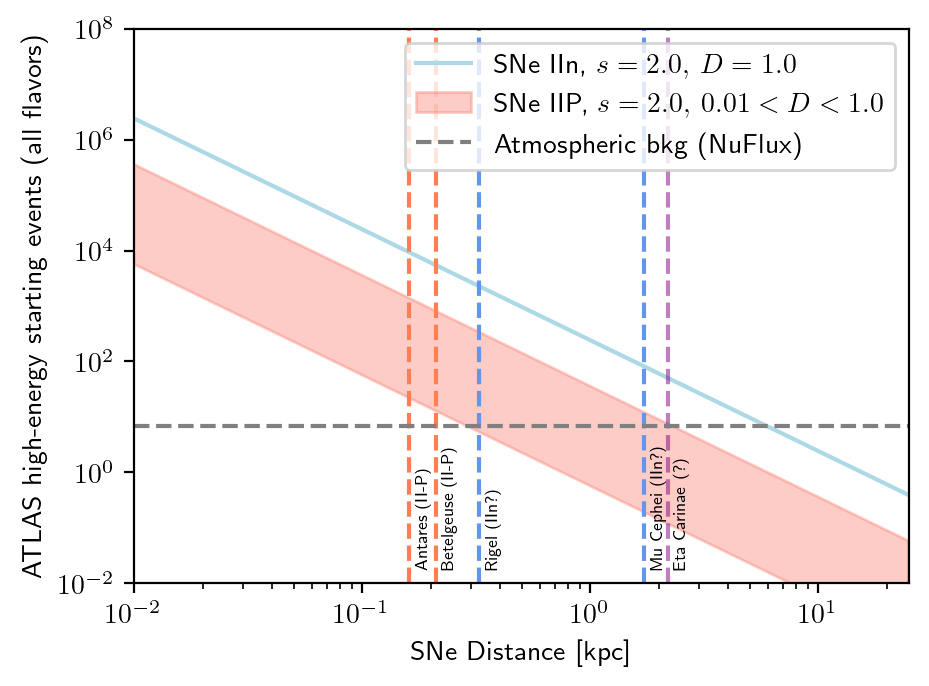

In [8]:
plt.rcParams['text.usetex'] = True
fig = plt.figure(figsize=(5, 3.6), dpi=200)

#plt.plot(distance_array, counts_2n, label='SNe IIn D=1.0, s=2.0')
#plt.plot(distance_array, counts_2P, label='SNe II-P D=0.1, s=2.0')

#plt.fill_between(distance_array, counts_2n_D0_01, counts_2n_D1_0, alpha=0.9, label=r'SNe IIn, $s=2.0, \: 0.01<D<1.0$', color='lightblue')
plt.plot(distance_array, counts_2n_D1_0, label=r'SNe IIn, $s=2.0, \: D=1.0$', color='lightblue')

plt.fill_between(distance_array, counts_2P_D0_01, counts_2P_D1_0, alpha=0.4, label=r'SNe IIP, $s=2.0, \: 0.01<D<1.0$', color='salmon')
#plt.plot(distance_array,counts_2n_D0_01)

kpc_ly = 1/3261.564

plt.axvline(550*kpc_ly*0.95, linestyle='--', color='coral')
plt.text(550*kpc_ly,2e-2,'Antares (II-P)',rotation=90, fontsize=6)

plt.axvline(720*kpc_ly*0.95, linestyle='--', color='coral')
plt.text(720*kpc_ly,2e-2,'Betelgeuse (II-P)',rotation=90 , fontsize=6)

plt.axvline(1118*kpc_ly*0.95, linestyle='--', color='cornflowerblue')
plt.text(1118*kpc_ly,2e-2,'Rigel (IIn?)',rotation=90 , fontsize=6)

plt.axvline(5900*kpc_ly*0.95, linestyle='--', color='cornflowerblue')
plt.text(5900*kpc_ly,2e-2,'Mu Cephei (IIn?)',rotation=90 , fontsize=6)

plt.axvline(7500*kpc_ly*0.95, linestyle='--', color='purple', alpha=0.5)
plt.text(7500*kpc_ly,2e-2,'Eta Carinae (?)',rotation=90 , fontsize=6)

plt.axhline(y=6.737794155356357, color='grey', linestyle='--', label='Atmospheric bkg (NuFlux)')

plt.xscale('log'); plt.xlim(1e-2,25)
plt.yscale('log'); plt.ylim(1e-2, 1e8)
plt.xlabel('SNe Distance [kpc]')
plt.ylabel('ATLAS high-energy starting events (all flavors)')
plt.legend(loc='upper right')


#plt.grid()
#plt.savefig('dist.pdf', dpi=300, bbox_inches="tight")

